In [19]:
# Ячейка 1: Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Настройка графиков
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("husl")

print("💰 ФИНАНСОВЫЙ АНАЛИЗАТОР КУРСОВ ВАЛЮТ")
print("=" * 50)
print(f"📅 Дата анализа: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print()

💰 ФИНАНСОВЫЙ АНАЛИЗАТОР КУРСОВ ВАЛЮТ
📅 Дата анализа: 2026-01-11 20:51:21



In [20]:
# Ячейка 2: Загрузка данных с выбором файла
print("📂 ВЫБОР ФАЙЛА ДЛЯ АНАЛИЗА")
print("=" * 40)

import os

# Ищем все CSV файлы с курсами валют
currency_files = [f for f in os.listdir() if f.startswith('currency_rates') and f.endswith('.csv')]

if currency_files:
    print("📁 Найдены файлы с данными:")
    for i, filename in enumerate(currency_files, 1):
        # Быстро проверяем сколько строк в файле
        try:
            temp_df = pd.read_csv(filename)
            num_currencies = len(temp_df)
            print(f"{i}. {filename} - {num_currencies} валют")
        except:
            print(f"{i}. {filename} - (ошибка чтения)")
    
        print(f"\n💡 Доступные файлы:")
    # Показываем реальные файлы
    for i, filename in enumerate(currency_files, 1):
        try:
            temp_df = pd.read_csv(filename)
            num_currencies = len(temp_df)
            currency_codes = ', '.join(temp_df['Код'].head(3).tolist())  # Показываем первые 3 кода
            print(f"   • {filename} - {num_currencies} валют (например: {currency_codes}...)")
        except:
            print(f"   • {filename}")
    
    try:
        choice = int(input(f"\n🎯 Ваш выбор (1-{len(currency_files)}): ")) - 1
        selected_file = currency_files[choice]
        print(f"✅ Выбран файл: {selected_file}")
    except:
        selected_file = 'currency_rates.csv'
        print(f"⚠️ Неверный выбор. Используем файл по умолчанию: {selected_file}")
else:
    selected_file = 'currency_rates.csv'
    print(f"⚠️ Файлы не найдены. Используем файл по умолчанию: {selected_file}")

print("\n📊 ЗАГРУЗКА ДАННЫХ...")

try:
    # Загружаем выбранный файл
    df = pd.read_csv(selected_file)
    
    print(f"✅ Успешно загружено {len(df)} валют")
    print(f"📁 Файл: {selected_file}")
    print(f"📊 Колонки: {list(df.columns)}")
    print()
    
    # Показываем таблицу
    print("📋 ТАБЛИЦА КУРСОВ ВАЛЮТ:")
    display(df.head(10))  # Показываем первые 10, чтобы не перегружать
    
    if len(df) > 10:
        print(f"... и ещё {len(df) - 10} валют")
    
except FileNotFoundError:
    print(f"❌ Файл {selected_file} не найден")
    print("💡 Сначала запустите: python currency_analyzer.py")
    print("   И выберите режим анализа валют")
    
    # Создаём пустой DataFrame чтобы не было ошибок
    df = pd.DataFrame()
except Exception as e:
    print(f"❌ Ошибка при загрузке файла: {e}")
    df = pd.DataFrame()

📂 ВЫБОР ФАЙЛА ДЛЯ АНАЛИЗА
📁 Найдены файлы с данными:
1. currency_rates_10_currencies.csv - 10 валют

💡 Доступные файлы:
2. currency_rates_20_currencies.csv - 20 валют

💡 Доступные файлы:
3. currency_rates.csv - 5 валют

💡 Доступные файлы:
   • currency_rates_10_currencies.csv - 10 валют (например: USD, EUR, GBP...)
   • currency_rates_20_currencies.csv - 20 валют (например: USD, EUR, CNY...)
   • currency_rates.csv - 5 валют (например: USD, EUR, CNY...)



🎯 Ваш выбор (1-3):  3


✅ Выбран файл: currency_rates.csv

📊 ЗАГРУЗКА ДАННЫХ...
✅ Успешно загружено 5 валют
📁 Файл: currency_rates.csv
📊 Колонки: ['Код', 'Название', 'Курс', 'Изменение', 'Изменение %', 'Рекомендация', 'Номинал']

📋 ТАБЛИЦА КУРСОВ ВАЛЮТ:


,Код,Название,Курс,Изменение,Изменение %,Рекомендация,Номинал
0,USD,Доллар США,78.23,0.7801,1.01,📈 Рост - выгодно продавать,1
1,EUR,Евро,92.09,0.6163,0.67,📈 Рост - выгодно продавать,1
2,CNY,Юань,11.16,0.1091,0.99,📈 Рост - выгодно продавать,1
3,GBP,Фунт стерлингов,105.61,0.9989,0.95,📈 Рост - выгодно продавать,1
4,JPY,Иен,50.05,0.5055,1.02,📈 Рост - выгодно продавать,100


In [21]:
# Ячейка 3: Базовый анализ
print("📈 БАЗОВЫЙ АНАЛИЗ")
print("=" * 40)

# 1. Общая информация
print("1️⃣ ОБЩАЯ ИНФОРМАЦИЯ:")
print(f"   • Всего валют: {len(df)}")
print(f"   • Дата данных: {datetime.now().strftime('%Y-%m-%d')}")
print()

# 2. Самая дорогая/дешёвая валюта
print("2️⃣ САМАЯ ДОРОГАЯ И ДЕШЁВАЯ ВАЛЮТА:")
most_expensive = df.loc[df['Курс'].idxmax()]
cheapest = df.loc[df['Курс'].idxmin()]

print(f"   • Самая дорогая: {most_expensive['Код']} ({most_expensive['Название']})")
print(f"     Курс: {most_expensive['Курс']} ₽ за {most_expensive['Номинал']} единиц")
print(f"   • Самая дешёвая: {cheapest['Код']} ({cheapest['Название']})")
print(f"     Курс: {cheapest['Курс']} ₽ за {cheapest['Номинал']} единиц")
print()

# 3. Максимальные изменения
print("3️⃣ НАИБОЛЬШИЕ ИЗМЕНЕНИЯ:")
max_increase = df.loc[df['Изменение'].idxmax()]
max_decrease = df.loc[df['Изменение'].idxmin()]

print(f"   • Самый большой рост: {max_increase['Код']}")
print(f"     Изменение: +{max_increase['Изменение']:.4f} ₽ ({max_increase['Изменение %']:.2f}%)")
print(f"   • Самый большой спад: {max_decrease['Код']}")
print(f"     Изменение: {max_decrease['Изменение']:.4f} ₽ ({max_decrease['Изменение %']:.2f}%)")

📈 БАЗОВЫЙ АНАЛИЗ
1️⃣ ОБЩАЯ ИНФОРМАЦИЯ:
   • Всего валют: 5
   • Дата данных: примерно 2026-01-11

2️⃣ САМАЯ ДОРОГАЯ И ДЕШЁВАЯ ВАЛЮТА:
   • Самая дорогая: GBP (Фунт стерлингов)
     Курс: 105.61 ₽ за 1 единиц
   • Самая дешёвая: CNY (Юань)
     Курс: 11.16 ₽ за 1 единиц

3️⃣ НАИБОЛЬШИЕ ИЗМЕНЕНИЯ:
   • Самый большой рост: GBP
     Изменение: +0.9989 ₽ (0.95%)
   • Самый большой спад: CNY
     Изменение: 0.1091 ₽ (0.99%)


📊 ВИЗУАЛИЗАЦИЯ КУРСОВ ВАЛЮТ


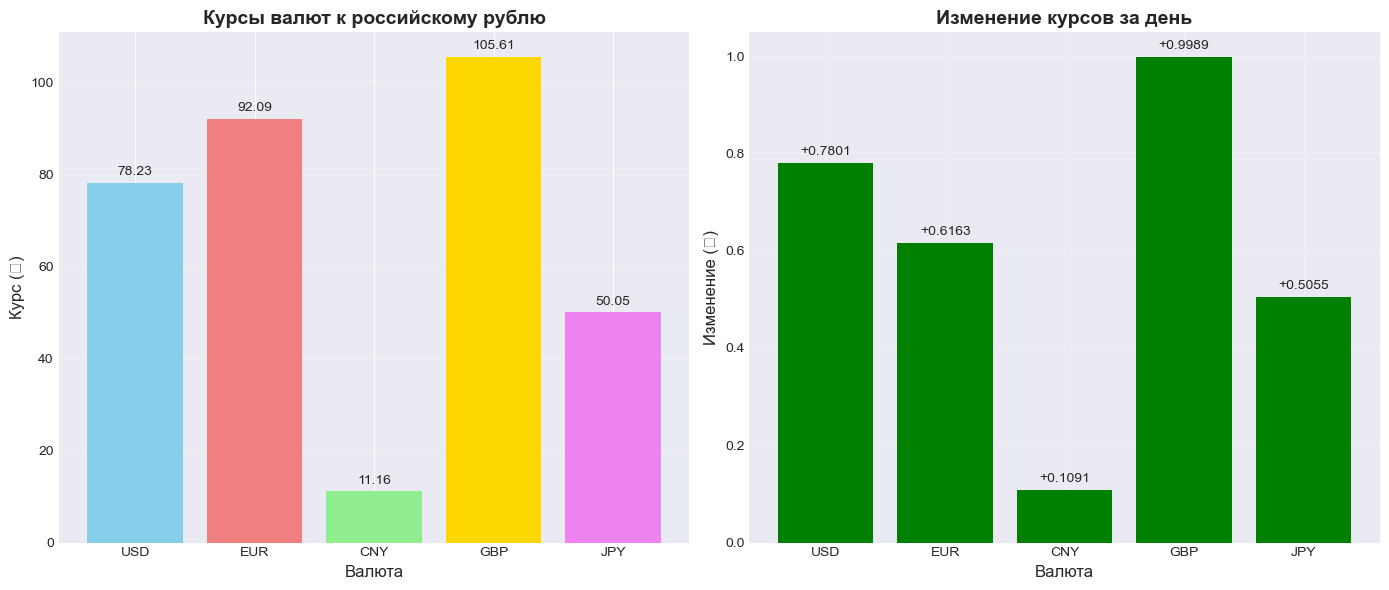

📈 ИНТЕРПРЕТАЦИЯ ГРАФИКОВ:
• Левый график: абсолютные значения курсов
• Правый график: изменение за день (зелёный = рост, красный = падение)
• Самый значительный рост: GBP (+0.9989 ₽)
• Самый значительный спад: CNY (+0.1091 ₽)


In [22]:
# Ячейка 4: Визуализация курсов валют
print("📊 ВИЗУАЛИЗАЦИЯ КУРСОВ ВАЛЮТ")
print("=" * 40)

# Создаём график
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. Столбчатая диаграмма курсов
bars = ax1.bar(df['Код'], df['Курс'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'])
ax1.set_title('Курсы валют к российскому рублю', fontsize=14, fontweight='bold')
ax1.set_xlabel('Валюта', fontsize=12)
ax1.set_ylabel('Курс (₽)', fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bar, value in zip(bars, df['Курс']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# 2. График изменений
colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in df['Изменение']]
bars2 = ax2.bar(df['Код'], df['Изменение'], color=colors)
ax2.set_title('Изменение курсов за день', fontsize=14, fontweight='bold')
ax2.set_xlabel('Валюта', fontsize=12)
ax2.set_ylabel('Изменение (₽)', fontsize=12)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.grid(True, alpha=0.3)

# Добавляем значения изменений
for bar, value in zip(bars2, df['Изменение']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.05),
             f'{value:+.4f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()

print("📈 ИНТЕРПРЕТАЦИЯ ГРАФИКОВ:")
print("• Левый график: абсолютные значения курсов")
print("• Правый график: изменение за день (зелёный = рост, красный = падение)")
print(f"• Самый значительный рост: {max_increase['Код']} ({max_increase['Изменение']:+.4f} ₽)")
print(f"• Самый значительный спад: {max_decrease['Код']} ({max_decrease['Изменение']:+.4f} ₽)")

In [23]:
# Ячейка 5: Простая торговая стратегия
print("🎯 ПРОСТАЯ ТОРГОВАЯ СТРАТЕГИЯ")
print("=" * 40)

# Фильтруем валюты для покупки и продажи
currencies_to_buy = df[df['Изменение'] < 0]  # Курс упал - выгодно покупать
currencies_to_sell = df[df['Изменение'] > 0]  # Курс вырос - выгодно продавать

print("1️⃣ ВАЛЮТЫ ДЛЯ ПОКУПКИ (курс упал):")
if not currencies_to_buy.empty:
    for _, currency in currencies_to_buy.iterrows():
        print(f"   • {currency['Код']} ({currency['Название']})")
        print(f"     Текущий курс: {currency['Курс']} ₽")
        print(f"     Изменение: {currency['Изменение']:.4f} ₽ ({currency['Изменение %']:.2f}%)")
        print(f"     Рекомендация: КУПИТЬ, цена снизилась")
        print()
else:
    print("   📉 Нет валют с падением курса сегодня")
    print("   💡 Подождите следующего обновления данных")

print("\n2️⃣ ВАЛЮТЫ ДЛЯ ПРОДАЖИ (курс вырос):")
if not currencies_to_sell.empty:
    for _, currency in currencies_to_sell.iterrows():
        print(f"   • {currency['Код']} ({currency['Название']})")
        print(f"     Текущий курс: {currency['Курс']} ₽")
        print(f"     Изменение: +{currency['Изменение']:.4f} ₽ (+{currency['Изменение %']:.2f}%)")
        print(f"     Рекомендация: ПРОДАТЬ, цена выросла")
        print()
else:
    print("   📈 Нет валют с ростом курса сегодня")
    print("   💡 Подождите следующего обновления данных")

print("\n💰 РЕКОМЕНДАЦИИ НА СЕГОДНЯ:")
print(f"   • Лучшая для покупки: {currencies_to_buy['Код'].iloc[0] if not currencies_to_buy.empty else 'Нет'}")
print(f"   • Лучшая для продажи: {currencies_to_sell['Код'].iloc[0] if not currencies_to_sell.empty else 'Нет'}")

🎯 ПРОСТАЯ ТОРГОВАЯ СТРАТЕГИЯ
1️⃣ ВАЛЮТЫ ДЛЯ ПОКУПКИ (курс упал):
   📉 Нет валют с падением курса сегодня
   💡 Подождите следующего обновления данных

2️⃣ ВАЛЮТЫ ДЛЯ ПРОДАЖИ (курс вырос):
   • USD (Доллар США)
     Текущий курс: 78.23 ₽
     Изменение: +0.7801 ₽ (+1.01%)
     Рекомендация: ПРОДАТЬ, цена выросла

   • EUR (Евро)
     Текущий курс: 92.09 ₽
     Изменение: +0.6163 ₽ (+0.67%)
     Рекомендация: ПРОДАТЬ, цена выросла

   • CNY (Юань)
     Текущий курс: 11.16 ₽
     Изменение: +0.1091 ₽ (+0.99%)
     Рекомендация: ПРОДАТЬ, цена выросла

   • GBP (Фунт стерлингов)
     Текущий курс: 105.61 ₽
     Изменение: +0.9989 ₽ (+0.95%)
     Рекомендация: ПРОДАТЬ, цена выросла

   • JPY (Иен)
     Текущий курс: 50.05 ₽
     Изменение: +0.5055 ₽ (+1.02%)
     Рекомендация: ПРОДАТЬ, цена выросла


💰 РЕКОМЕНДАЦИИ НА СЕГОДНЯ:
   • Лучшая для покупки: Нет
   • Лучшая для продажи: USD


In [24]:
# Ячейка 6: Сохранение результатов анализа
print("💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ АНАЛИЗА")
print("=" * 40)

# Создаём отчёт в HTML
html_report = f"""
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <title>Анализ курсов валют</title>
    <style>
        body {{ font-family: Arial, sans-serif; margin: 40px; }}
        h1 {{ color: #2c3e50; }}
        .summary {{ background-color: #f8f9fa; padding: 20px; border-radius: 10px; }}
        .recommendation {{ padding: 15px; margin: 10px 0; border-left: 4px solid; }}
        .buy {{ border-color: #27ae60; background-color: #d5f4e6; }}
        .sell {{ border-color: #c0392b; background-color: #fadbd8; }}
        table {{ width: 100%; border-collapse: collapse; margin: 20px 0; }}
        th, td {{ padding: 12px; text-align: left; border-bottom: 1px solid #ddd; }}
        th {{ background-color: #3498db; color: white; }}
    </style>
</head>
<body>
    <h1>💰 Отчёт анализа курсов валют</h1>
    <p>Дата анализа: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}</p>
    
    <div class="summary">
        <h2>📊 Краткое резюме</h2>
        <p>Всего проанализировано валют: {len(df)}</p>
        <p>Средний курс доллара: {df[df['Код'] == 'USD']['Курс'].values[0]:.2f} ₽</p>
        <p>Средний курс евро: {df[df['Код'] == 'EUR']['Курс'].values[0]:.2f} ₽</p>
    </div>
    
    <h2>🎯 Рекомендации</h2>
"""

# Добавляем рекомендации
for _, currency in df.iterrows():
    if currency['Изменение'] > 0:
        html_report += f"""
    <div class="recommendation sell">
        <strong>{currency['Код']} ({currency['Название']})</strong><br>
        Курс: {currency['Курс']} ₽ | Изменение: +{currency['Изменение']:.4f} ₽<br>
        <strong>Рекомендация: ПРОДАТЬ</strong> - курс вырос
    </div>
        """
    elif currency['Изменение'] < 0:
        html_report += f"""
    <div class="recommendation buy">
        <strong>{currency['Код']} ({currency['Название']})</strong><br>
        Курс: {currency['Курс']} ₽ | Изменение: {currency['Изменение']:.4f} ₽<br>
        <strong>Рекомендация: КУПИТЬ</strong> - курс упал
    </div>
        """

html_report += """
    <h2>📈 Данные по валютам</h2>
    <table>
        <tr>
            <th>Код</th>
            <th>Название</th>
            <th>Курс (₽)</th>
            <th>Изменение (₽)</th>
            <th>Изменение (%)</th>
            <th>Рекомендация</th>
        </tr>
"""

# Добавляем строки таблицы
for _, currency in df.iterrows():
    html_report += f"""
        <tr>
            <td>{currency['Код']}</td>
            <td>{currency['Название']}</td>
            <td>{currency['Курс']:.2f}</td>
            <td>{currency['Изменение']:+.4f}</td>
            <td>{currency['Изменение %']:+.2f}%</td>
            <td>{'ПРОДАТЬ' if currency['Изменение'] > 0 else 'КУПИТЬ' if currency['Изменение'] < 0 else 'ЖДАТЬ'}</td>
        </tr>
"""

html_report += """
    </table>
    <p><em>Ай ай ай доверять простым рекомендациям из моего проекта!!!! Инвестируйте с умом!</em></p>
</body>
</html>
"""

# Сохраняем HTML отчёт
with open('currency_analysis_report.html', 'w', encoding='utf-8') as f:
    f.write(html_report)

print(f"✅ HTML отчёт сохранён в 'currency_analysis_report.html'")
print(f"✅ Откройте файл в браузере для просмотра")

# Сохраняем обогащённые данные
df.to_csv('currency_analysis_full.csv', index=False, encoding='utf-8-sig')
print(f"✅ Полные данные анализа сохранены в 'currency_analysis_full.csv'")

print("\n" + "="*50)
print("🎉 АНАЛИЗ ЗАВЕРШЁН УСПЕШНО!")
print("="*50)
print("\n📁 Созданные файлы:")
print("• currency_analysis_report.html - HTML отчёт")
print("• currency_analysis_full.csv - полные данные")
print("• currency_rates.csv - исходные данные")
print("• currency_rates.json - данные в JSON формате")
print("• currency_report.txt - текстовый отчёт")

💾 СОХРАНЕНИЕ РЕЗУЛЬТАТОВ АНАЛИЗА
✅ HTML отчёт сохранён в 'currency_analysis_report.html'
✅ Откройте файл в браузере для просмотра
✅ Полные данные анализа сохранены в 'currency_analysis_full.csv'

🎉 АНАЛИЗ ЗАВЕРШЁН УСПЕШНО!

📁 Созданные файлы:
• currency_analysis_report.html - HTML отчёт
• currency_analysis_full.csv - полные данные
• currency_rates.csv - исходные данные
• currency_rates.json - данные в JSON формате
• currency_report.txt - текстовый отчёт
